In [1]:
import numpy as np
import matplotlib.pyplot as plt

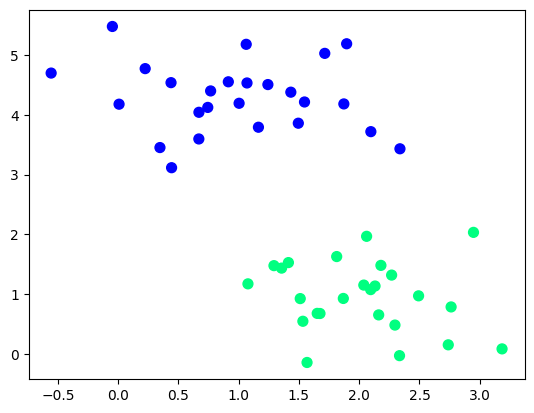

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plt.show()

In [4]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1)
model.fit(X, y)

SVC(C=1, kernel='linear')

In [5]:
def plot_svc_decision_function(model_, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x_lim = ax.get_xlim()
    y_lim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(x_lim[0], x_lim[1], 30)
    y_ = np.linspace(y_lim[0], y_lim[1], 30)
    y_1, x_ = np.meshgrid(y_, x)
    xy = np.vstack([x_.ravel(), y_1.ravel()]).T
    p = model_.decision_function(xy).reshape(x_.shape)

    # plot decision boundary and margins
    ax.contour(x_, y_1, p, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model_.support_vectors_[:, 0],
                   model_.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none')
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)

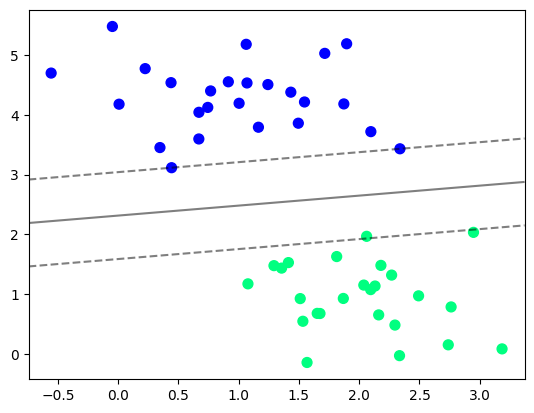

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model);